# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder
import sys
sys.path.append("classifiers")  # path contains python_file.py

# Importing Classifiers
from perceptron import Perceptron
from adaline import AdalineGD

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

In [2]:
# Insert your code below
# ======================
# Dataframe from CSV File
wine_data = pd.read_csv('../assets/wine.csv')

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    float64
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
 11  class                 799 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 75.0 KB


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,8.278974,0.527778,0.272603,2.441740,0.088531,16.068210,47.700876,0.996668,3.309900,0.660225,10.413934,0.534418
std,1.678945,0.179432,0.199947,1.263095,0.050939,10.401708,33.388266,0.001876,0.159114,0.173437,1.059409,0.499126
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.500000,0.995545,3.200000,0.550000,9.500000,0.000000
50%,7.900000,0.530000,0.260000,2.200000,0.079000,14.000000,39.000000,0.996680,3.300000,0.620000,10.100000,1.000000
75%,9.200000,0.640000,0.425000,2.500000,0.091000,22.000000,64.000000,0.997800,3.400000,0.730000,11.100000,1.000000
max,15.000000,1.330000,1.000000,15.400000,0.610000,68.000000,289.000000,1.003690,4.010000,2.000000,14.000000,1.000000


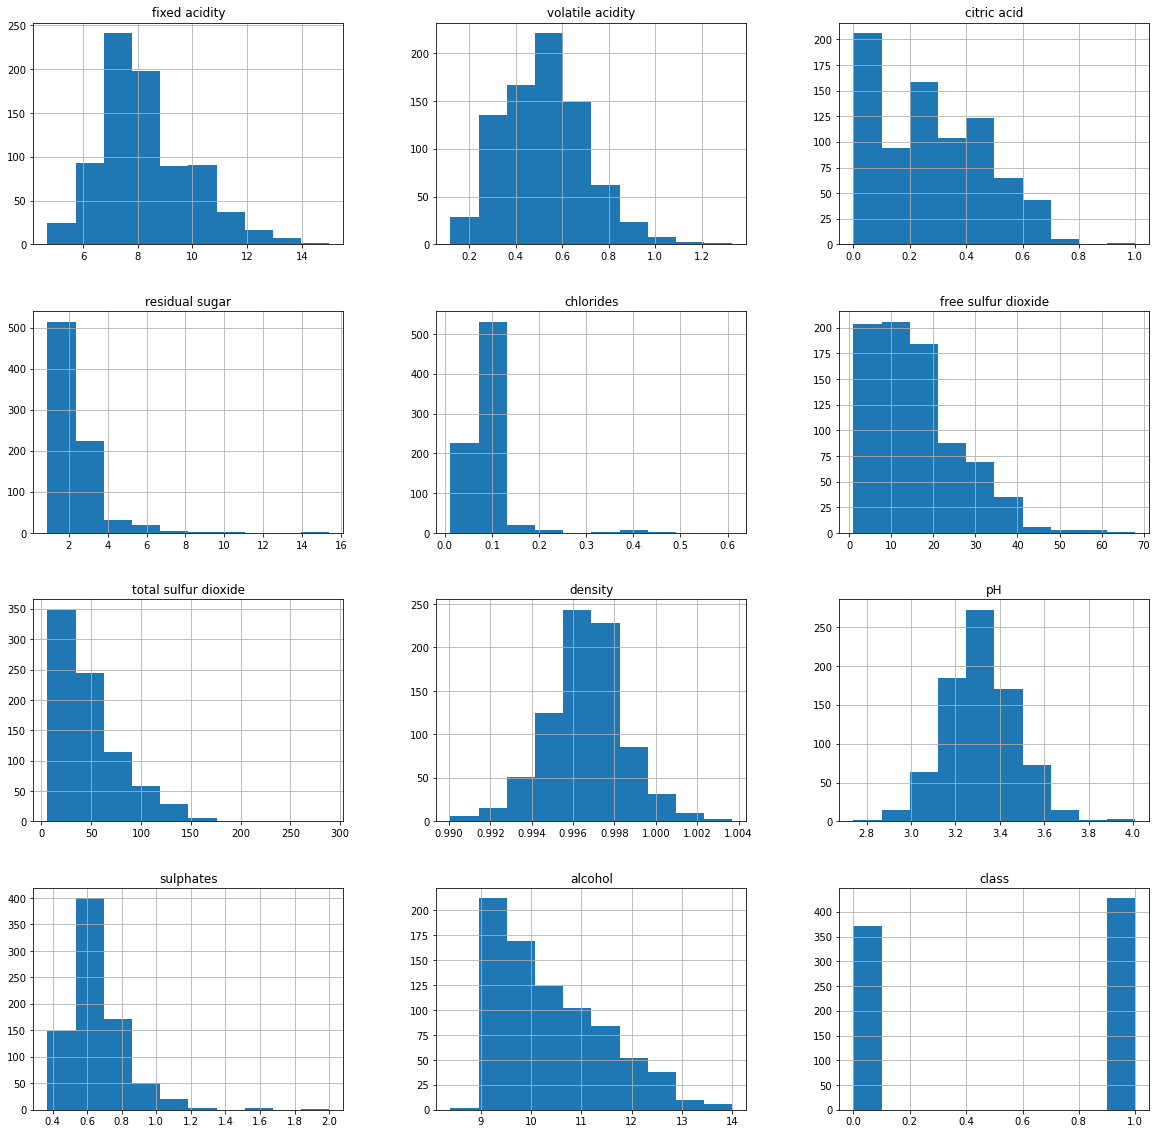

In [5]:
# Histograms
wine_data.hist(figsize=(20,20))
plt.show()

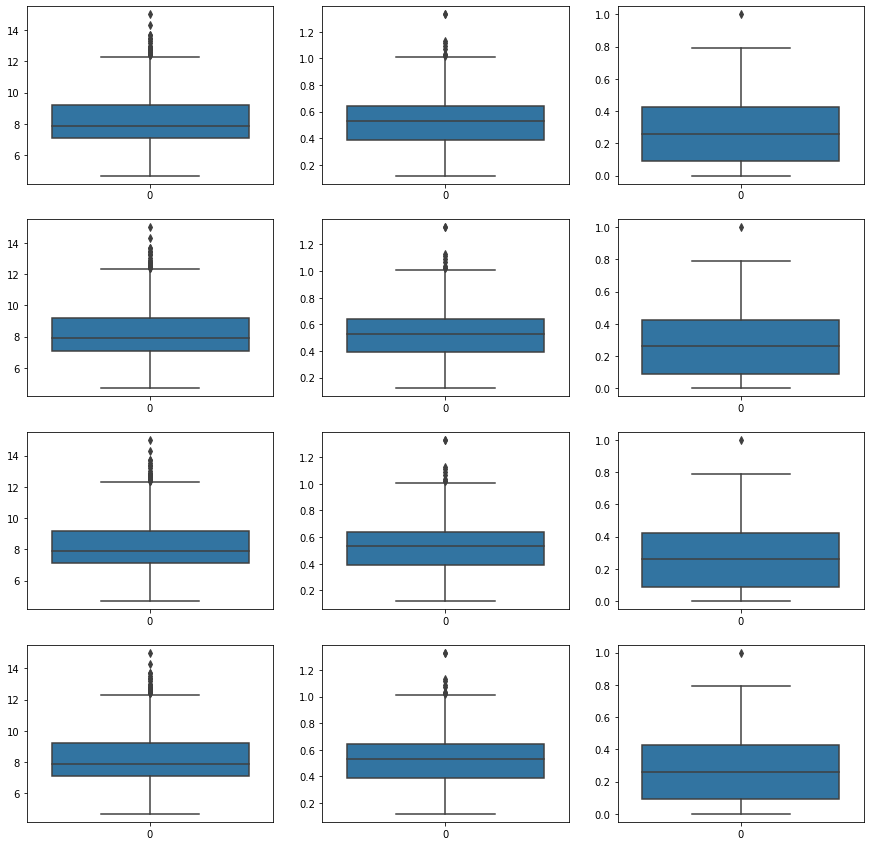

In [6]:
# Box Plots of the Columns
fig, axs = plt.subplots(4, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    if row == 0:
        col = 0
    else:
        col += 1
    sns.boxplot(data=wine_data[wine_data.columns[col]], ax=x[0])
    col += 1
    sns.boxplot(data=wine_data[wine_data.columns[col]], ax=x[1])
    col += 1
    sns.boxplot(data=wine_data[wine_data.columns[col]], ax=x[2])

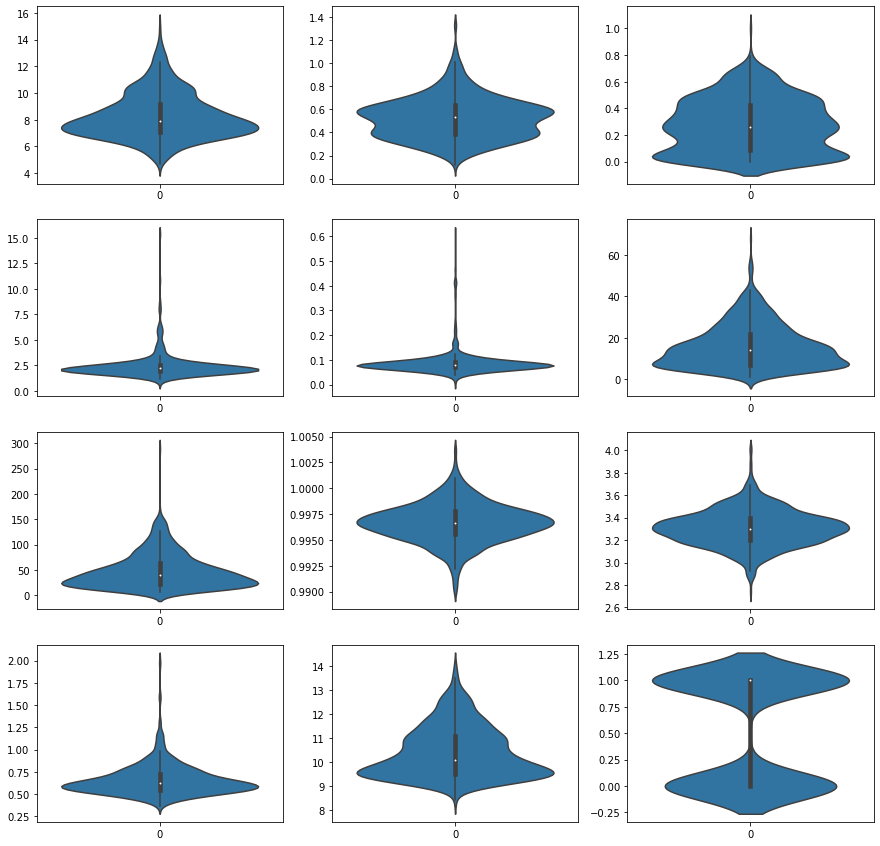

In [7]:
# Violin Plots of the Columns
fig, axs = plt.subplots(4, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    if row == 0:
        col = 0
    else:
        col += 1
    sns.violinplot(data=wine_data[wine_data.columns[col]], ax=x[0])
    col += 1
    sns.violinplot(data=wine_data[wine_data.columns[col]], ax=x[1])
    col += 1
    sns.violinplot(data=wine_data[wine_data.columns[col]], ax=x[2])
    row += 1

#### Raw Data Visualization Conclusion

After Visualizing the raw data we can see that there some outlier values in some columns of the data. Both perceptron and adaline are linear classification models and they differentiate classes by a linear line. The outliers values can result in missclassification of classes. The outliers can produce curves in the linear classification line that can result in missclassification of classes. Also, Due to the outliers the models will have to adjust weights more times in orders to get the best weights so it will require more epochs to get the best result

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

__Preprocessing:__

In [8]:
# Insert your code below
# ======================

#Checking For Missing Values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
class                   0
dtype: int64

No Null Values Found

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,1
1,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,1
2,6.6,0.695,0.00,2.1,0.075,12.0,56.0,0.99680,3.49,0.67,9.2,0
3,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,1
4,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,1


In [10]:
# Replacing Class 0 with -1 because the code of our classifiers only predict 1 or -1 
wine_data.loc[wine_data['class'] == 0, 'class'] = -1

# Defining Data and Target Varaibles
X = wine_data.iloc[:, 0:11]
y = wine_data.iloc[:,11]

In [11]:
# Spliting The Data Into Test and Training Set
# We take the first 400 values as training data

X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test = y[400:]

In [12]:
# Standarizing the Data by subtracting the mean and dividing by Standard Deviation
#X_train_sc = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=0)
#X_test_sc = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=0)    

In [13]:
#X_train_sc.head()

In [14]:
#X_test_sc.head()

In [15]:
# Training Perceptron
ppn_data = []
index = ['50 Out Of 400','100 Out Of 400','150 Out Of 400','200 Out Of 400','250 Out Of 400','300 Out Of 400','350 Out Of 400','400 Out Of 400']
columns = []
for x in range(1,9):
    accuracy = []
    for y in range(1,51):
        size = 50 * x
        # Making Subsets of Data. 
        subset_data = X_train[:size]
        subset_target = y_train[:size]
        X_train_sc = (subset_data - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)
        X_test_sc = (X_test - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)    
        ppn_model = Perceptron(eta=0.0001 ,n_iter=y, random_state=1)
        ppn_model.fit(X_train_sc.values.astype(np.float64),subset_target)
        y_pred = ppn_model.predict(X_test_sc)
        classified =len(y_test) - (y_test != y_pred).sum()
        accuracy.append(classified/len(y_test))
        if x==1:
         columns.append(str(y) + ' Epochs')
    ppn_data.append(accuracy)

# Generating a 8 * 50 Dataframe of accuracies.
df_ppn = pd.DataFrame(ppn_data,index= index,columns=columns) 
df_ppn

,1 Epochs,2 Epochs,3 Epochs,4 Epochs,5 Epochs,6 Epochs,7 Epochs,8 Epochs,9 Epochs,10 Epochs,...,41 Epochs,42 Epochs,43 Epochs,44 Epochs,45 Epochs,46 Epochs,47 Epochs,48 Epochs,49 Epochs,50 Epochs
50 Out Of 400,0.523810,0.538847,0.568922,0.561404,0.566416,0.583960,0.598997,0.588972,0.586466,0.578947,...,0.591479,0.611529,0.598997,0.598997,0.596491,0.614035,0.604010,0.601504,0.586466,0.614035
100 Out Of 400,0.533835,0.591479,0.626566,0.619048,0.631579,0.639098,0.646617,0.646617,0.651629,0.654135,...,0.671679,0.701754,0.676692,0.729323,0.704261,0.686717,0.724311,0.716792,0.691729,0.704261
150 Out Of 400,0.571429,0.616541,0.629073,0.649123,0.656642,0.656642,0.661654,0.646617,0.636591,0.644110,...,0.661654,0.706767,0.626566,0.684211,0.689223,0.676692,0.609023,0.684211,0.661654,0.696742
200 Out Of 400,0.601504,0.644110,0.664160,0.684211,0.676692,0.679198,0.671679,0.671679,0.701754,0.676692,...,0.656642,0.686717,0.706767,0.671679,0.679198,0.681704,0.651629,0.724311,0.696742,0.664160
250 Out Of 400,0.598997,0.661654,0.681704,0.669173,0.676692,0.654135,0.644110,0.619048,0.606516,0.701754,...,0.656642,0.631579,0.684211,0.684211,0.676692,0.694236,0.631579,0.681704,0.591479,0.689223
300 Out Of 400,0.591479,0.644110,0.651629,0.624060,0.609023,0.458647,0.533835,0.533835,0.553885,0.598997,...,0.518797,0.614035,0.646617,0.536341,0.516291,0.486216,0.639098,0.606516,0.606516,0.634085
350 Out Of 400,0.619048,0.654135,0.646617,0.656642,0.701754,0.644110,0.508772,0.669173,0.654135,0.666667,...,0.696742,0.656642,0.694236,0.649123,0.591479,0.654135,0.649123,0.706767,0.649123,0.686717
400 Out Of 400,0.624060,0.669173,0.664160,0.626566,0.586466,0.568922,0.626566,0.634085,0.629073,0.626566,...,0.563910,0.576441,0.631579,0.606516,0.606516,0.548872,0.561404,0.586466,0.591479,0.576441


In [16]:
# Training Adaline
ada_data = []
index = ['50 Out Of 400','100 Out Of 400','150 Out Of 400','200 Out Of 400','250 Out Of 400','300 Out Of 400','350 Out Of 400','400 Out Of 400']
columns = []
for x in range(1,9):
    accuracy = []
    for y in range(1,51):
        size = 50 * x
        subset_data = X_train[:size]
        subset_target = y_train[:size]
        X_train_sc = (subset_data - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)
        X_test_sc = (X_test - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)    
        ada_model = AdalineGD(eta=0.0001 ,n_iter=y, random_state=1)
        ada_model.fit(X_train_sc.values.astype(np.float64),subset_target)
        y_pred = ada_model.predict(X_test_sc)
        classified =len(y_test) - (y_test != y_pred).sum()
        accuracy.append(classified/len(y_test))
        if x==1:
         columns.append(str(y) + ' Epochs')
    ada_data.append(accuracy)
        #print ('Misclassified: Subset:'+ str(x) + 'Epoch:' + str(y) + '    ' + str((y_test != y_pred).sum()))

df_ada = pd.DataFrame(ada_data,index= index,columns=columns) 
df_ada

,1 Epochs,2 Epochs,3 Epochs,4 Epochs,5 Epochs,6 Epochs,7 Epochs,8 Epochs,9 Epochs,10 Epochs,...,41 Epochs,42 Epochs,43 Epochs,44 Epochs,45 Epochs,46 Epochs,47 Epochs,48 Epochs,49 Epochs,50 Epochs
50 Out Of 400,0.496241,0.526316,0.536341,0.543860,0.556391,0.573935,0.581454,0.593985,0.611529,0.611529,...,0.626566,0.626566,0.621554,0.621554,0.621554,0.621554,0.621554,0.621554,0.621554,0.621554
100 Out Of 400,0.523810,0.558897,0.591479,0.639098,0.661654,0.671679,0.671679,0.684211,0.694236,0.691729,...,0.719298,0.719298,0.719298,0.719298,0.719298,0.719298,0.719298,0.719298,0.719298,0.719298
150 Out Of 400,0.543860,0.614035,0.664160,0.701754,0.704261,0.701754,0.704261,0.714286,0.716792,0.716792,...,0.726817,0.729323,0.726817,0.726817,0.726817,0.726817,0.726817,0.726817,0.729323,0.729323
200 Out Of 400,0.578947,0.664160,0.686717,0.694236,0.704261,0.706767,0.704261,0.706767,0.704261,0.706767,...,0.731830,0.731830,0.731830,0.731830,0.736842,0.736842,0.736842,0.741855,0.741855,0.739348
250 Out Of 400,0.576441,0.684211,0.716792,0.714286,0.726817,0.724311,0.719298,0.719298,0.731830,0.734336,...,0.731830,0.734336,0.739348,0.739348,0.739348,0.739348,0.739348,0.736842,0.736842,0.734336
300 Out Of 400,0.606516,0.701754,0.734336,0.729323,0.736842,0.734336,0.734336,0.736842,0.741855,0.741855,...,0.736842,0.731830,0.731830,0.731830,0.731830,0.731830,0.731830,0.731830,0.729323,0.729323
350 Out Of 400,0.644110,0.709273,0.714286,0.714286,0.734336,0.734336,0.731830,0.731830,0.736842,0.736842,...,0.731830,0.731830,0.731830,0.731830,0.729323,0.729323,0.731830,0.731830,0.729323,0.729323
400 Out Of 400,0.649123,0.714286,0.726817,0.734336,0.734336,0.741855,0.736842,0.734336,0.734336,0.734336,...,0.729323,0.729323,0.729323,0.731830,0.731830,0.731830,0.731830,0.726817,0.726817,0.726817


## Now We Try Removing the Outliers

In [17]:
# Updating Outliers

# replacing values that are outside the 90th percentile with the median values

for x in wine_data.columns:
    wine_data[x] = np.where(wine_data[x] > wine_data[x].quantile(0.90),
                                                 wine_data[x].quantile(0.50), wine_data[x])


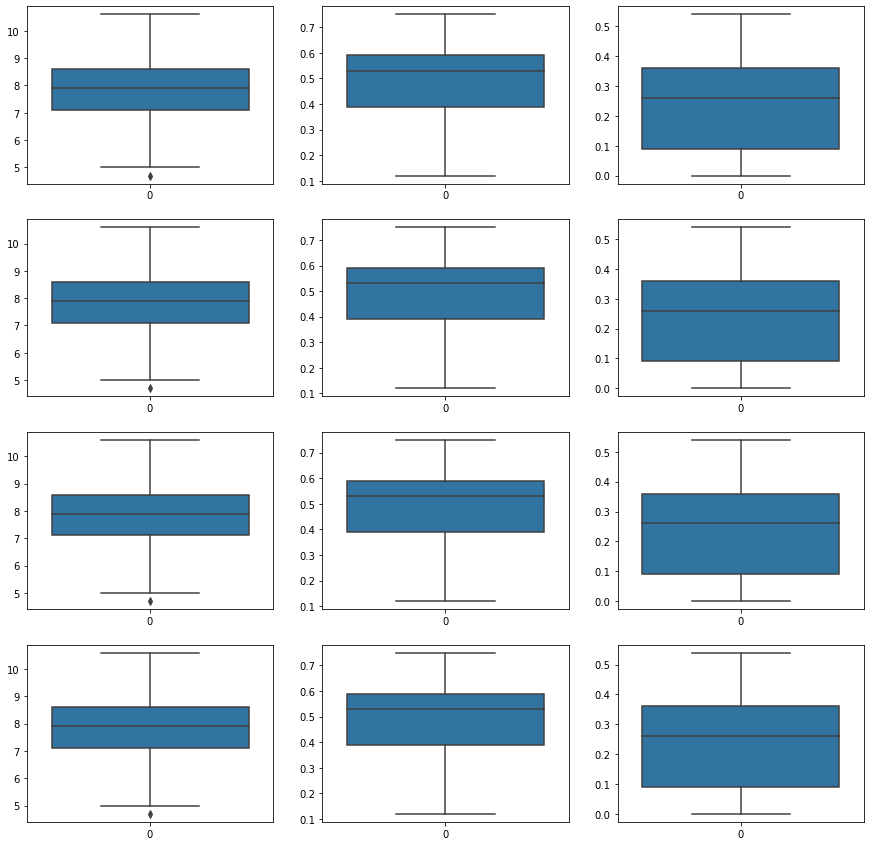

In [18]:
# Visualizing After Updaying outliers
fig, axs = plt.subplots(4, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    if row == 0:
        col = 0
    else:
        col += 1
    sns.boxplot(data=wine_data[wine_data.columns[col]], ax=x[0])
    col += 1
    sns.boxplot(data=wine_data[wine_data.columns[col]], ax=x[1])
    col += 1
    sns.boxplot(data=wine_data[wine_data.columns[col]], ax=x[2])

In [19]:
# Training Models like we did before after removing outliers 

X = wine_data.iloc[:, 0:11]
y = wine_data.iloc[:,11]

X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test = y[400:]

# X_train_sc = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=0)
# X_test_sc = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=0)   


ppn_data_updated = []
index = ['50 Out Of 400','100 Out Of 400','150 Out Of 400','200 Out Of 400','250 Out Of 400','300 Out Of 400','350 Out Of 400','400 Out Of 400']
columns = []
for x in range(1,9):
    accuracy = []
    for y in range(1,51):
        size = 50 * x
        subset_data = X_train[:size]
        subset_target = y_train[:size]
        X_train_sc = (subset_data - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)
        X_test_sc = (X_test - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)    
        ppn_model = Perceptron(eta=0.0001 ,n_iter=y, random_state=1)
        ppn_model.fit(X_train_sc.values.astype(np.float64),subset_target)
        y_pred = ppn_model.predict(X_test_sc)
        classified =len(y_test) - (y_test != y_pred).sum()
        accuracy.append(classified/len(y_test))
        if x==1:
         columns.append(str(y) + ' Epochs')
    ppn_data_updated.append(accuracy)

df_ppn_updated = pd.DataFrame(ppn_data_updated,index= index,columns=columns) 
df_ppn_updated


ada_data_updated = []
index = ['50 Out Of 400','100 Out Of 400','150 Out Of 400','200 Out Of 400','250 Out Of 400','300 Out Of 400','350 Out Of 400','400 Out Of 400']
columns = []
for x in range(1,9):
    accuracy = []
    for y in range(1,51):
        size = 50 * x
        subset_data = X_train[:size]
        subset_target = y_train[:size]
        X_train_sc = (subset_data - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)
        X_test_sc = (X_test - np.mean(subset_data, axis=0)) / np.std(subset_data, axis=0, ddof=0)    
        ada_model = AdalineGD(eta=0.0001 ,n_iter=y, random_state=1)
        ada_model.fit(X_train_sc.values.astype(np.float64),subset_target)
        y_pred = ada_model.predict(X_test_sc)
        classified =len(y_test) - (y_test != y_pred).sum()
        accuracy.append(classified/len(y_test))
        if x==1:
         columns.append(str(y) + ' Epochs')
    ada_data_updated.append(accuracy)

df_ada_updated = pd.DataFrame(ada_data,index= index,columns=columns) 

In [20]:
# Max Accuracuies
print(df_ppn.to_numpy().max())
print(df_ppn_updated.to_numpy().max())
print(df_ada.to_numpy().max())
print(df_ada_updated.to_numpy().max())

0.7393483709273183
0.7418546365914787
0.7443609022556391
0.7443609022556391


__Training:__

## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn (Lenker til en ekstern side.). See below what the heatmaps should look like for the two classification algorithms.

<AxesSubplot:>

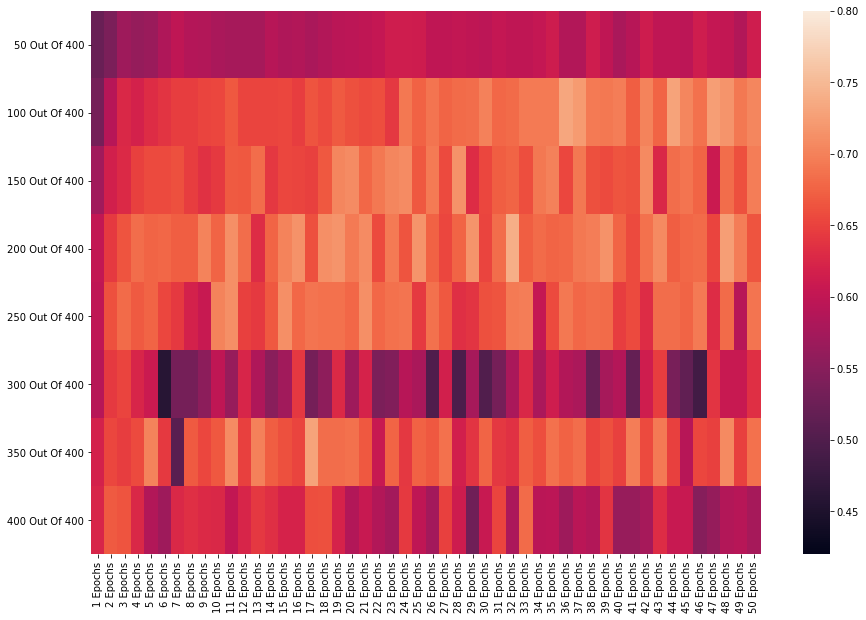

In [21]:
# # Insert your code below
# # ======================
plt.figure(figsize = (15,10))
sns.heatmap(df_ppn,vmin=0.42, vmax=0.80)

<AxesSubplot:>

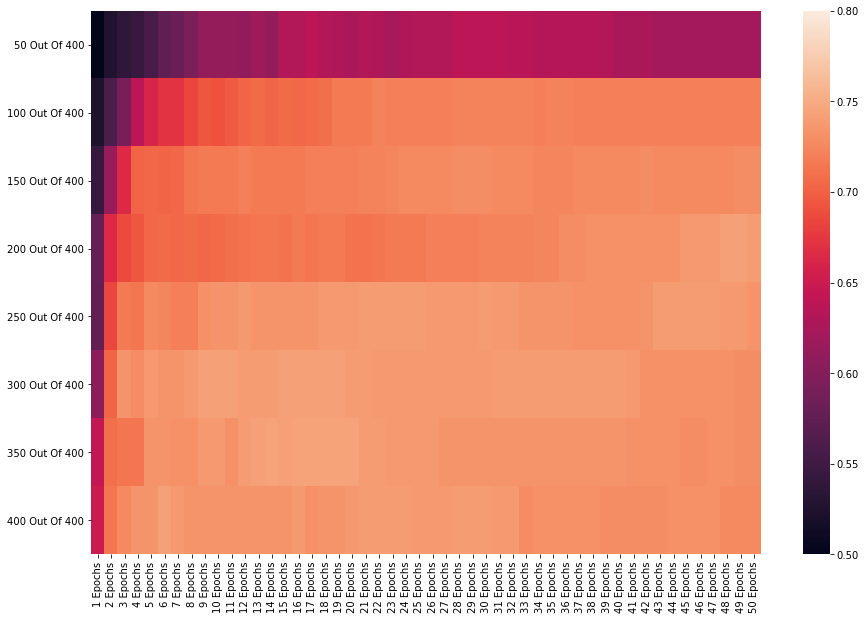

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df_ada,vmin=0.50, vmax=0.80)

## After Outliers Updated

<AxesSubplot:>

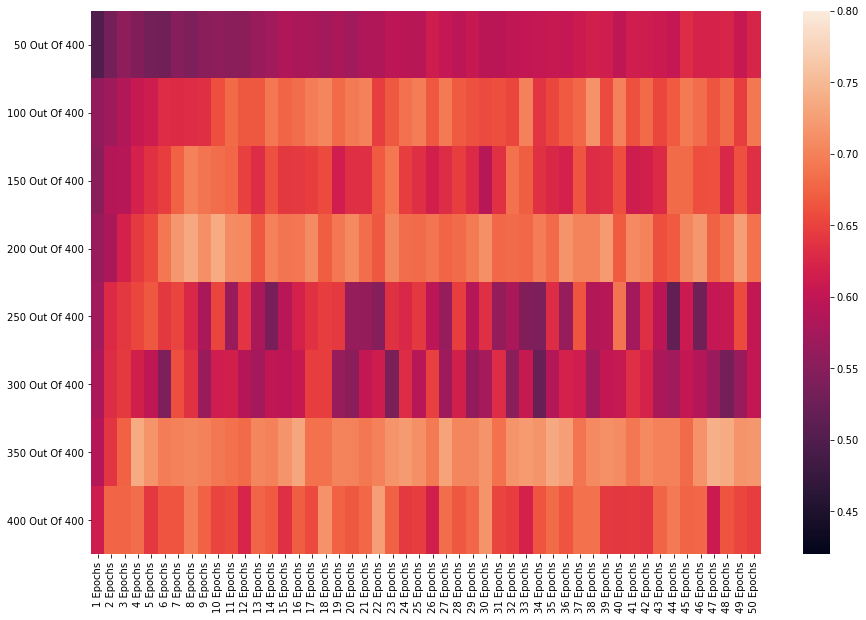

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(df_ppn_updated,vmin=0.42, vmax=0.80)

<AxesSubplot:>

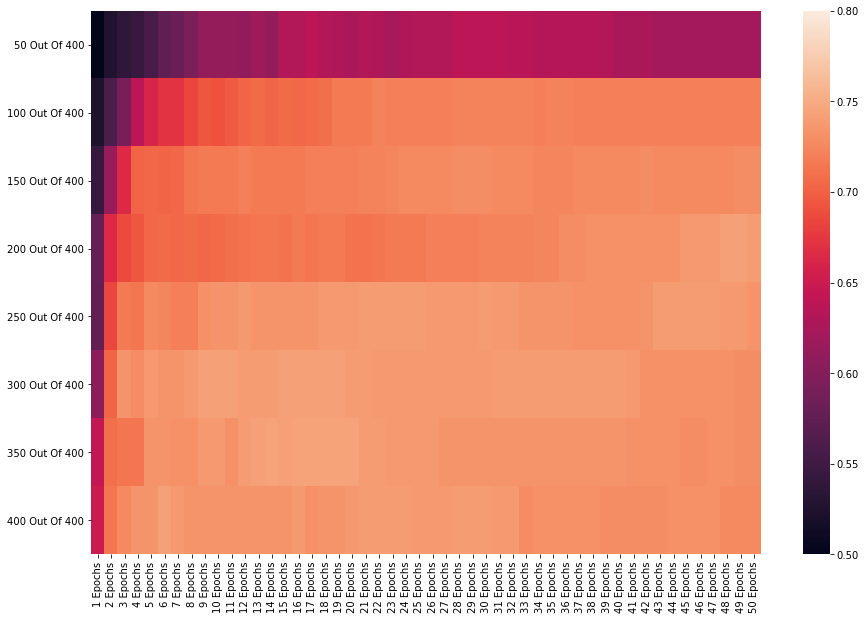

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(df_ada_updated,vmin=0.50, vmax=0.80)

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [25]:
# Print the best accuracries and at what subset and epoch they were achieved
max_ppn_index = ''
max_ppn_epoch = ''
max_ppn_accuracy = 0

max_ada_index = ''
max_ada_epoch = ''
max_ada_accuracy = 0

max_ppn_updated_index = ''
max_ppn_updated_epoch = ''
max_ppn_updated_accuracy = 0

max_ada_updated_index = ''
max_ada_updated_epoch = ''
max_ada_updated_accuracy = 0

for x in range(50):
    if df_ppn.iloc[df_ppn[df_ppn.columns[x]].argmax()][df_ppn.columns[x]] > max_ppn_accuracy:
        max_ppn_index = df_ppn.index[df_ppn[df_ppn.columns[x]].argmax()]
        max_ppn_epoch = df_ppn.columns[x]
        max_ppn_accuracy = df_ppn.iloc[df_ppn[df_ppn.columns[x]].argmax()][df_ppn.columns[x]]
    
    if df_ada.iloc[df_ada[df_ada.columns[x]].argmax()][df_ada.columns[x]] > max_ada_accuracy:
        max_ada_index = df_ada.index[df_ada[df_ada.columns[x]].argmax()]
        max_ada_epoch = df_ada.columns[x]
        max_ada_accuracy = df_ada.iloc[df_ada[df_ada.columns[x]].argmax()][df_ada.columns[x]]
                               
    if df_ppn_updated.iloc[df_ppn_updated[df_ppn_updated.columns[x]].argmax()][df_ppn_updated.columns[x]] > max_ppn_updated_accuracy:
        max_ppn_updated_index = df_ppn_updated.index[df_ppn_updated[df_ppn_updated.columns[x]].argmax()]
        max_ppn_updated_epoch = df_ppn_updated.columns[x]
        max_ppn_updated_accuracy = df_ppn_updated.iloc[df_ppn_updated[df_ppn_updated.columns[x]].argmax()][df_ppn_updated.columns[x]]
                               
    if df_ada_updated.iloc[df_ada_updated[df_ada_updated.columns[x]].argmax()][df_ada_updated.columns[x]] > max_ada_updated_accuracy:
        max_ada_updated_index = df_ada_updated.index[df_ada_updated[df_ada_updated.columns[x]].argmax()]
        max_ada_updated_epoch = df_ada_updated.columns[x]
        max_ada_updated_accuracy = df_ada_updated.iloc[df_ada_updated[df_ada_updated.columns[x]].argmax()][df_ada_updated.columns[x]]
    
                                               
print (f'Perceptron Highest Accuracy was {max_ppn_accuracy} At {max_ppn_index} with {max_ppn_epoch}')

print (f'Adaline Highest Accuracy was {max_ada_accuracy} At {max_ada_index} with {max_ada_epoch}')

print ('After Removing Outliers:')

print (f'Perceptron Highest Accuracy was {max_ppn_updated_accuracy} At {max_ppn_updated_index} with {max_ppn_updated_epoch}')

print (f'Adaline Highest Accuracy was {max_ada_updated_accuracy} At {max_ada_updated_index} with {max_ada_updated_epoch}')

Perceptron Highest Accuracy was 0.7393483709273183 At 200 Out Of 400 with 32 Epochs
Adaline Highest Accuracy was 0.7443609022556391 At 350 Out Of 400 with 14 Epochs
After Removing Outliers:
Perceptron Highest Accuracy was 0.7418546365914787 At 350 Out Of 400 with 47 Epochs
Adaline Highest Accuracy was 0.7443609022556391 At 350 Out Of 400 with 14 Epochs


## Discussion

The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?

__Insert your answer below__

=====================

The training time of perceptron is longer than the adaline because the perceptron calculates error and updates the weights after every row in each iteration whereas the addaline calculates error and updates weights only once per iteration.